In [1]:
import pandas as pd
from scipy.stats import zscore

In [4]:
df = pd.read_csv('2022_forbes_billionaires.csv')

# Clean the NetWorth column
df['networth'] = df['networth'].str.replace('$', '', regex = False) # Remove $
df['networth'] = df['networth'].str.replace(' B', '', regex=False)  # Remove B
df['networth'] = pd.to_numeric(df['networth'], errors='coerce')     # convert to numeric

# Drop rows with missing or invalid networth values
df = df.dropna(subset=['networth'])

# Calculate z score for the networth
df['networth_zscore'] = zscore(df['networth'])

# Calculte percentiles for networth
df['networth_zscore'] = df['networth'].rank(pct = True) * 100

# Dispay Mean and STD
networth_mean = df['networth'].mean()
networth_std = df['networth'].std()
print(f"The mean of networths : {networth_mean : .2f} B")
print(f"The standard deviation : {networth_std : .2f} B")

#Display the first few rows of the updated dataframe
print('\n First few rows of the updated dataframe with z- scores and percentiles : ')
print(df.head())
print(df.tail())

# Save the modified dataframe to a csv file
df.to_csv('Billionaire-with-networth-z-scores-and-percntiles.csv', index=False)


The mean of networths :  4.86 B
The standard deviation :  10.66 B

 First few rows of the updated dataframe with z- scores and percentiles : 
   Unnamed: 0  rank                       name  networth  age        country  \
0           0     1                 Elon Musk      219.0   50  United States   
1           1     2                Jeff Bezos      171.0   58  United States   
2           2     3  Bernard Arnault & family      158.0   73         France   
3           3     4                Bill Gates      129.0   66  United States   
4           4     5            Warren Buffett      118.0   91  United States   

               source                industry  networth_zscore  
0       Tesla, SpaceX             Automotive        100.000000  
1              Amazon             Technology         99.961538  
2                LVMH       Fashion & Retail         99.923077  
3           Microsoft             Technology         99.884615  
4  Berkshire Hathaway  Finance & Investments        

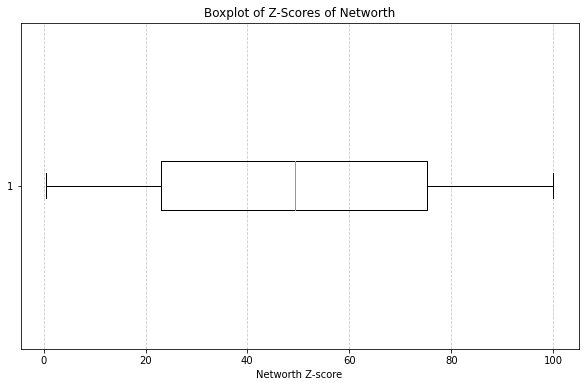

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.boxplot(df['networth_zscore'], vert=False)
plt.title('Boxplot of Z-Scores of Networth')
plt.xlabel('Networth Z-score')
plt.grid(axis='x', linestyle = '--', alpha= 0.7)
plt.show()